[View in Colaboratory](https://colab.research.google.com/github/shashank2806/rtu-hackathon/blob/master/NoBroker.ipynb)

###Here we are are trying to find a optimal machine learning algorithm for predicting house rents.

We are importing files from local machine

In [0]:
from google.colab import files
files.upload()

In [0]:
!ls
!unzip hackathon_rentomter_nobroker.csv.zip
!ls

hackathon_rentomter_nobroker.csv.zip  sample_data
Archive:  hackathon_rentomter_nobroker.csv.zip
  inflating: hackathon_rentomter_nobroker.csv  
hackathon_rentomter_nobroker.csv      sample_data
hackathon_rentomter_nobroker.csv.zip


#At first we tried using RandomForest for prediction

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [0]:
data = pd.read_csv('hackathon_rentomter_nobroker.csv')

We can see there are 26 attributes

In [0]:
# features of datatype
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [0]:
# view datatypes of each column
data.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom             int64
facing              object
cup_board          float64
floor                int64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent                 int64
deposit            float64
dtype: object

In [0]:
# set target
y = data.rent

##To see corelation between features and target value, We have plotted here a corelation matrix.


Then we decided to keep features which are corelated to target value

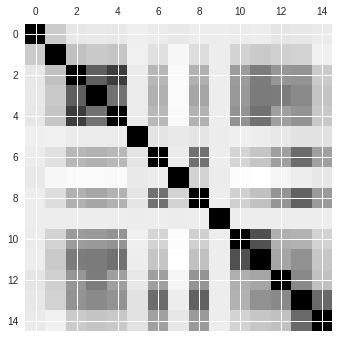

In [0]:
# Find Corelation
import matplotlib.pyplot as plt

plt.matshow(data.corr())

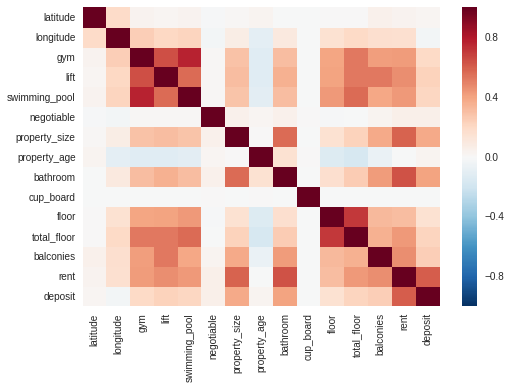

In [0]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
# data = data.drop(['id'],axis=1)

In [0]:
# one_hot_pred = pd.get_dummies(data)

In [0]:
# len(one_hot_pred.columns)

**here we finding low cardinality catogerical data as well as numerical data**

In [0]:
# Identify categorical columns with low cardinality (a small number of distinct values)
def low_cardinality_cols(data_frame):
    low_cardinality_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].nunique() < 50 and
                                data_frame[cname].dtype == "object"]
    return(low_cardinality_cols)
  
cat_data_features =low_cardinality_cols(data)

In [0]:
# Identify numeric columns
def numeric_cols(data_frame):
    numeric_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].dtype in ['int64', 'float64']]
    return(numeric_cols)
  
  
num_data_features = numeric_cols(data)

In [0]:
data_one_hot = pd.get_dummies(data[cat_data_features + num_data_features])

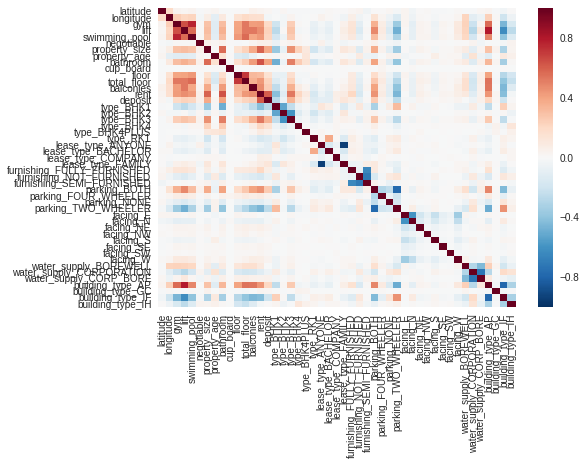

In [0]:
corr = data_one_hot.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [0]:
features_cor = ['longitude', 'gym', 'lift', 'swimming_pool', 'property_size', 'bathroom', 'floor', 'total_floor', 'balconies', 'deposit']
data_new = data[features_cor]

In [0]:
y = data.rent

In [0]:
# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(data_new, y, test_size=0.2)

In [0]:
new_dt_model=RandomForestRegressor()

new_dt_model.fit(train_X,train_y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
val_predictions = new_dt_model.predict(val_X)

In [0]:
# print accuracy
from sklearn.metrics import mean_absolute_error
train_accuracy = new_dt_model.score(train_X, train_y)
val_accuracy = new_dt_model.score(val_X, val_y)
print('train_accuracy: ',train_accuracy)
print('val_accuracy: ',val_accuracy)

train_accuracy:  0.9717363519161945
val_accuracy:  0.8329870941147625


**We can see our model has overfitted the training data. But, Still we have achieved accuracy of 83.2% on test data**

In [0]:
# Add few additional features to improve accuracy
feat = ['building_type', 'parking', 'type']
data_new_new = pd.get_dummies(data[features_cor + feat])

In [0]:
y = data.rent

In [0]:
# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(data_new_new, y, test_size=0.2)


In [0]:
new_rf_model=RandomForestRegressor()

new_rf_model.fit(train_X,train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# print accuracy
from sklearn.metrics import mean_absolute_error
train_accuracy = new_rf_model.score(train_X, train_y)
val_accuracy = new_rf_model.score(val_X, val_y)
print('train_accuracy: ',train_accuracy)
print('val_accuracy: ',val_accuracy)

train_accuracy:  0.9719537945534938
val_accuracy:  0.850683491562521




Here we gained slightly better performance, But model is still overfitted. We have to use Regularisation techniques


As we have seen a good accuracy on test data.
But there is significant amount of variance in our model.

We need regularistion to decrease variance

##XGBoost

We are using gradient boosting algorithm and ensambling methods. In this method we combined ddifferent ML models untill we get results

In [0]:
from xgboost import XGBRegressor

We have set hare n_estimators to 1000 to limit max no of estimators which can be used. we have also set early_stopping_rounds=5 to stop training if accuracy is not improving

In [0]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], verbose=False)
val_predictions = xgb_model.predict(val_X)

In [0]:
from sklearn.metrics import mean_absolute_error
train_accuracy = xgb_model.score(train_X, train_y)
val_accuracy = xgb_model.score(val_X, val_y)
print('train_accuracy: ',train_accuracy)
print('val_accuracy: ',val_accuracy)

train_accuracy:  0.8667897185337283
val_accuracy:  0.861577327164334


**Finally With help of this model we have tackled overfitting and also gained better accuracy. Here got train as well as test accuracy of 86%**